# Predict AFL Match Winners with Machine Learning and Python (2009-2024)

![AFL](AFL_stock_2.png) 

### Data Source: http://www.aussportsbetting.com/data/ 
Only showcases match data from Round 12 2009 afterwards. Note that I have transformed the dataset myself, unfortunately I can not release the transformed dataset. The Purpose of this project was to enable to understand predictions on Winning Matches and identify patterns based on past football matches

### Step 1: Checking the match data

In [1]:
import pandas as pd

In [2]:
matches = pd.read_excel(r'C:\Users\Michael Le\Desktop\AFL_Project_12_24\raw_afl_match_data_2009_present.xlsx')
#Displays all columns and rows
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth',None)

In [3]:
matches.head()

,Date,Kick Off (local),Home Team,Away Team,Venue,Home Score,Away Score,Play Off Game?,Home Goals,Home Behinds,Away Goals,Away Behinds,Home Odds,Away Odds,Bookmakers Surveyed,Home Odds Open,Home Odds Min,Home Odds Max,Home Odds Close,Away Odds Open,Away Odds Min,Away Odds Max,Away Odds Close,Home Line Open,Home Line Min,Home Line Max,Home Line Close,Away Line Open,Away Line Min,Away Line Max,Away Line Close,Home Line Odds Open,Home Line Odds Min,Home Line Odds Max,Home Line Odds Close,Away Line Odds Open,Away Line Odds Min,Away Line Odds Max,Away Line Odds Close,Total Score Open,Total Score Min,Total Score Max,Total Score Close,Total Score Over Open,Total Score Over Min,Total Score Over Max,Total Score Over Close,Total Score Under Open,Total Score Under Min,Total Score Under Max,Total Score Under Close
0,2024-09-28,14:30:00,Sydney,Brisbane,MCG,60,120,Y,9,6,18,12,1.73,2.02,12,1.780,1.72,1.80,1.75,2.05,2.05,2.15,2.15,-3.5,-4.5,-2.5,-3.5,3.5,2.5,4.5,3.5,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91,170.5,170.5,175.5,175.5,1.89,1.88,1.91,1.910,1.89,1.88,1.91,1.91
1,2024-09-21,17:15:00,Geelong,Brisbane,MCG,85,95,Y,12,13,14,11,1.78,1.97,12,1.680,1.68,1.87,1.87,2.20,1.97,2.20,1.97,-5.5,-5.5,-1.5,-1.5,5.5,1.5,5.5,1.5,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91,173.5,168.5,173.5,168.5,1.91,1.91,1.91,1.910,1.91,1.91,1.91,1.91
2,2024-09-20,19:40:00,Sydney,Port Adelaide,SCG,95,59,Y,14,11,8,11,1.35,3.02,12,1.333,1.28,1.38,1.36,3.35,3.20,3.50,3.30,-19.5,-20.5,-17.5,-18.5,19.5,17.5,20.5,18.5,1.91,1.88,1.91,1.91,1.91,1.91,1.91,1.91,168.5,168.5,169.5,169.5,1.89,1.88,1.91,1.910,1.89,1.88,1.91,1.91
3,2024-09-14,19:30:00,GWS Giants,Brisbane,ENGIE Stadium,100,105,Y,15,10,15,15,1.67,2.12,12,1.800,1.68,1.80,1.68,2.02,2.02,2.25,2.25,-3.5,-5.5,-3.5,-5.5,3.5,3.5,5.5,5.5,1.91,1.91,1.91,1.91,1.91,1.91,1.91,1.91,167.5,166.5,168.5,167.5,1.91,1.91,1.91,1.952,1.91,1.91,1.91,1.87
4,2024-09-13,19:10:00,Port Adelaide,Hawthorn,Adelaide Oval,75,72,Y,11,9,11,6,2.18,1.64,12,2.200,2.20,2.35,2.25,1.68,1.59,1.68,1.68,5.5,5.5,8.5,7.5,-5.5,-8.5,-5.5,-7.5,1.97,1.97,1.91,1.91,1.85,1.88,1.85,1.91,165.5,165.5,166.5,166.5,1.89,1.88,1.91,1.910,1.89,1.88,1.91,1.91


### Checking the shape of the data

In [4]:
matches.shape

(3137, 51)

### Step 2: Cleaning and Transforming Missing Data

### Check the data types for our data

In [5]:
matches.dtypes

Date                       datetime64[ns]
Kick Off (local)                   object
Home Team                          object
Away Team                          object
Venue                              object
Home Score                          int64
Away Score                          int64
Play Off Game?                     object
Home Goals                          int64
Home Behinds                        int64
Away Goals                          int64
Away Behinds                        int64
Home Odds                         float64
Away Odds                         float64
Bookmakers Surveyed                 int64
Home Odds Open                    float64
Home Odds Min                     float64
Home Odds Max                     float64
Home Odds Close                   float64
Away Odds Open                    float64
Away Odds Min                     float64
Away Odds Max                     float64
Away Odds Close                   float64
Home Line Open                    

### Check any missing data

In [6]:
matches.isnull().sum()

Date                          0
Kick Off (local)              0
Home Team                     0
Away Team                     0
Venue                         0
Home Score                    0
Away Score                    0
Play Off Game?             3001
Home Goals                    0
Home Behinds                  0
Away Goals                    0
Away Behinds                  0
Home Odds                     0
Away Odds                     0
Bookmakers Surveyed           0
Home Odds Open              681
Home Odds Min               690
Home Odds Max               690
Home Odds Close             681
Away Odds Open              681
Away Odds Min               690
Away Odds Max               690
Away Odds Close             681
Home Line Open              683
Home Line Min               693
Home Line Max               693
Home Line Close             683
Away Line Open              683
Away Line Min               692
Away Line Max               692
Away Line Close             683
Home Lin

### Refer from this link on how to clean the data https://saturncloud.io/blog/how-to-find-all-rows-with-nan-values-in-python-pandas/

### Note you can enter them manually to provide actual results? Ask yourself will it change your future predictions and accuraccies inside our different types of machine learning models?

In [7]:
### For practise, we drop columns with missing values only in this case

In [8]:
matches = matches.dropna(axis='columns')
matches

,Date,Kick Off (local),Home Team,Away Team,Venue,Home Score,Away Score,Home Goals,Home Behinds,Away Goals,Away Behinds,Home Odds,Away Odds,Bookmakers Surveyed
0,2024-09-28,14:30:00,Sydney,Brisbane,MCG,60,120,9,6,18,12,1.73,2.02,12
1,2024-09-21,17:15:00,Geelong,Brisbane,MCG,85,95,12,13,14,11,1.78,1.97,12
2,2024-09-20,19:40:00,Sydney,Port Adelaide,SCG,95,59,14,11,8,11,1.35,3.02,12
3,2024-09-14,19:30:00,GWS Giants,Brisbane,ENGIE Stadium,100,105,15,10,15,15,1.67,2.12,12
4,2024-09-13,19:10:00,Port Adelaide,Hawthorn,Adelaide Oval,75,72,11,9,11,6,2.18,1.64,12
5,2024-09-07,19:30:00,Brisbane,Carlton,Gabba,99,71,14,15,11,5,1.24,3.80,12
6,2024-09-07,15:20:00,Sydney,GWS Giants,SCG,88,82,13,10,12,10,1.56,2.32,12
7,2024-09-06,19:40:00,Western Bulldogs,Hawthorn,MCG,62,99,9,8,14,15,1.62,2.20,12
8,2024-09-05,19:10:00,Port Adelaide,Geelong,Adelaide Oval,54,138,7,12,20,18,1.35,3.04,12
9,2024-08-25,16:10:00,Fremantle,Port Adelaide,Optus Stadium,67,87,9,13,13,9,1.72,2.04,12


In [9]:
#matches = matches.interpolate()
#print(matches)

### Check any missing data

In [10]:
matches.dtypes

Date                   datetime64[ns]
Kick Off (local)               object
Home Team                      object
Away Team                      object
Venue                          object
Home Score                      int64
Away Score                      int64
Home Goals                      int64
Home Behinds                    int64
Away Goals                      int64
Away Behinds                    int64
Home Odds                     float64
Away Odds                     float64
Bookmakers Surveyed             int64
dtype: object

In [11]:
matches.isnull().sum()

Date                   0
Kick Off (local)       0
Home Team              0
Away Team              0
Venue                  0
Home Score             0
Away Score             0
Home Goals             0
Home Behinds           0
Away Goals             0
Away Behinds           0
Home Odds              0
Away Odds              0
Bookmakers Surveyed    0
dtype: int64

In [12]:

matches['hour'] = pd.to_datetime(matches['Kick Off (local)'].astype(str)).dt.hour

C:\Users\Michael Le\AppData\Local\Temp\ipykernel_19016\3129350272.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  matches['hour'] = pd.to_datetime(matches['Kick Off (local)'].astype(str)).dt.hour


In [13]:
matches["day_code"] = matches["Date"].dt.dayofweek

### Data Exploration or Feature Engineering

In [14]:
#what is the win rate for the home team?

# Total number of matches.
n_matches = matches.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = matches.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(matches[matches['Home Score'] > matches['Away Score']])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print("Number of features: {}".format(n_features))
print("Number of matches won by home team: {}".format(n_homewins))
print("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 3137
Number of features: 15
Number of matches won by home team: 1776
Win rate of home team: 56.61%


In [15]:
matches['HTGD'] = matches['Home Goals']-matches['Away Goals']
matches['ATGD'] = matches['Away Goals']-matches['Home Goals']
matches['DiffFormPts'] = matches['Home Score']-matches['Away Score']
matches['HTBD'] = matches['Home Behinds']-matches['Away Behinds']
matches['ATBD'] = matches['Away Behinds']-matches['Home Behinds']


<Figure size 1000x800 with 0 Axes>

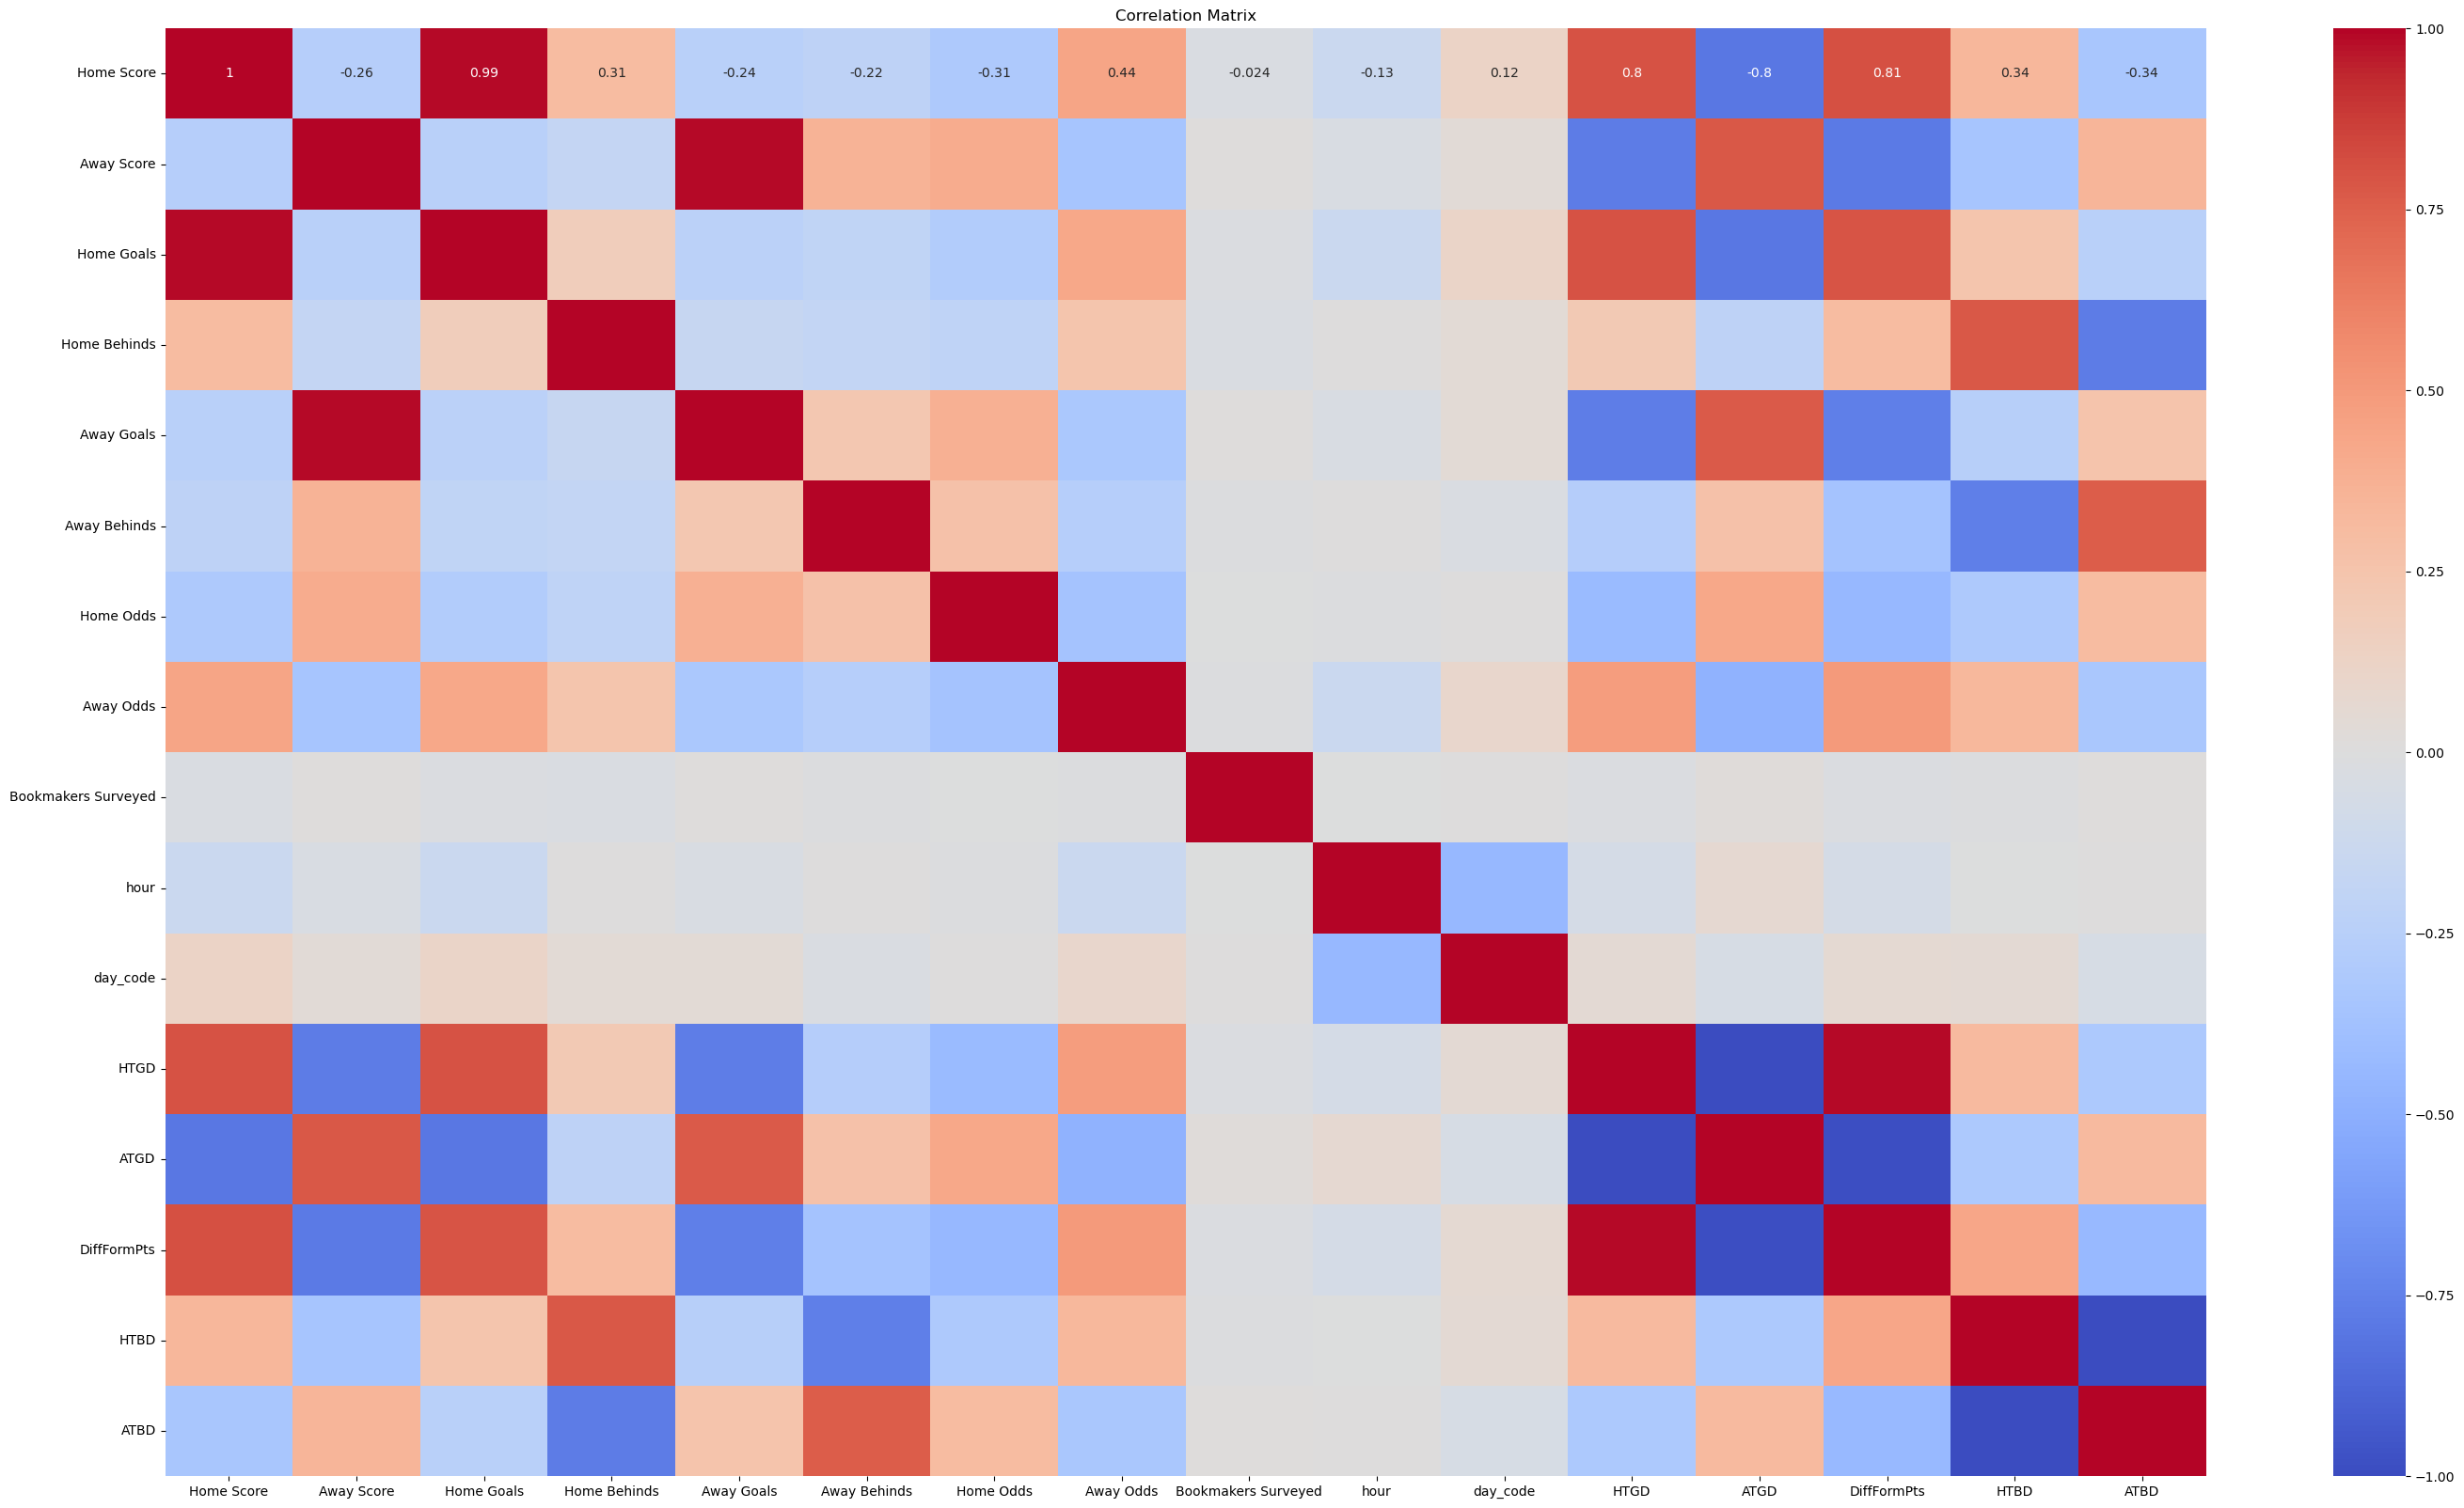

In [16]:
# Correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
matches.drop(['Date','Kick Off (local)','Venue','Home Team','Away Team'],axis=1, inplace=True)
plt.figure(figsize=(35, 20))
sns.heatmap(matches.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Train-Test-Validation Split

In [17]:
#matches = pd.read_csv(r'C:\Users\Michael Le\Desktop\AFL_Project_12_24\final_matches.csv')

In [18]:
#matches.dtypes

In [19]:
# Where X is our features, and y is our target variable
#2. 
matches['target'] = (matches['Home Score'] > matches['Away Score']).astype("int")
features = [
    "Home Goals",
    "Away Goals",
    "Home Behinds",
    "Away Behinds",
    "Home Odds",
    "Away Odds",
    "hour",
    "day_code",
    "DiffFormPts",
    "HTBD",
    "ATBD"
]
X = matches[features]
y = matches['target']


In [20]:
matches.corr()

,Home Score,Away Score,Home Goals,Home Behinds,Away Goals,Away Behinds,Home Odds,Away Odds,Bookmakers Surveyed,hour,day_code,HTGD,ATGD,DiffFormPts,HTBD,ATBD,target
Home Score,1.000000,-0.263082,0.990659,0.309633,-0.242613,-0.217040,-0.305697,0.444852,-0.024097,-0.134868,0.119271,0.799831,-0.799831,0.805479,0.342875,-0.342875,0.622409
Away Score,-0.263082,1.000000,-0.246769,-0.178075,0.990531,0.360761,0.403254,-0.346069,0.010567,-0.035004,0.033756,-0.776080,0.776080,-0.783655,-0.348161,0.348161,-0.615008
Home Goals,0.990659,-0.246769,1.000000,0.177082,-0.228387,-0.198031,-0.286403,0.424735,-0.020594,-0.139797,0.116885,0.797130,-0.797130,0.789444,0.243381,-0.243381,0.607788
Home Behinds,0.309633,-0.178075,0.177082,1.000000,-0.158522,-0.185621,-0.209281,0.249049,-0.030319,0.001393,0.045802,0.214389,-0.214389,0.308750,0.777612,-0.777612,0.254136
Away Goals,-0.242613,0.990531,-0.228387,-0.158522,1.000000,0.229301,0.381624,-0.322520,0.012885,-0.037088,0.039179,-0.769903,0.769903,-0.764659,-0.251162,0.251162,-0.600622
Away Behinds,-0.217040,0.360761,-0.198031,-0.185621,0.229301,1.000000,0.266480,-0.262568,-0.012613,0.003781,-0.026834,-0.272019,0.272019,-0.361349,-0.762159,0.762159,-0.280040
Home Odds,-0.305697,0.403254,-0.286403,-0.209281,0.381624,0.266480,1.000000,-0.365027,-0.006223,-0.008222,0.007465,-0.424416,0.424416,-0.444535,-0.308394,0.308394,-0.346395
Away Odds,0.444852,-0.346069,0.424735,0.249049,-0.322520,-0.262568,-0.365027,1.000000,-0.009304,-0.138113,0.091655,0.478434,-0.478434,0.499008,0.332091,-0.332091,0.342607
Bookmakers Surveyed,-0.024097,0.010567,-0.020594,-0.030319,0.012885,-0.012613,-0.006223,-0.009304,1.000000,-0.000410,0.006868,-0.021490,0.021490,-0.022007,-0.011905,0.011905,-0.001150
hour,-0.134868,-0.035004,-0.139797,0.001393,-0.037088,0.003781,-0.008222,-0.138113,-0.000410,1.000000,-0.442144,-0.068633,0.068633,-0.065337,-0.001502,0.001502,-0.057012


In [21]:
from sklearn.model_selection import train_test_split

# Step 1: Split the full dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Split the 80% training set into 60% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

### Apply normalisation on X (both the training and test set)

One reason this is important is because the variables are multiplied by the model weights. So the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model might converge without normalization, normalization makes training much more stable.

In [22]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

# transform validation data
X_val_norm = norm.transform(X_val)

## Use the models

In [23]:
import numpy
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Model Training 

In [24]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train_norm,y_train)

#Random Forest
rf = RandomForestRegressor(max_depth=2,random_state=22)
rf.fit(X_train_norm,y_train)

#Gradient Boosting Regressor
xgb = GradientBoostingRegressor()
xgb.fit(X_train_norm,y_train)

#Support Vector Machine (Regression)
svr = SVR()
svr.fit(X_train_norm,y_train)

#K-Nearest Neighbour 
knn = KNeighborsRegressor()
knn.fit(X_train_norm,y_train)

#XBG Boost Regressor   
xgr = XGBRegressor()
xgr.fit(X_train_norm,y_train)

#Logistic Regression
logr = linear_model.LogisticRegression()
logr.fit(X_train_norm,y_train)

#Decision Tree
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf = 0.1,random_state=3)
## Fit the decision Tree
dt.fit(X_train_norm,y_train)


DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

### Prediction on the Test Data

In [25]:
y_pred1 = lr.predict(X_test_norm)
y_pred2 = rf.predict(X_test_norm)
y_pred3 = xgb.predict(X_test_norm)
y_pred4= svr.predict(X_test_norm)
y_pred5= knn.predict(X_test_norm)
y_pred6 = xgr.predict(X_test_norm)
y_pred7 = logr.predict(X_test_norm)
y_pred8 = dt.predict(X_test_norm)

### Evaluating the Algorithm

In [26]:
from sklearn import metrics

## Computing their R squared values on the testing data

In [27]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
score5 = metrics.r2_score(y_test,y_pred5)
score6 = metrics.r2_score(y_test,y_pred6)
score7 = metrics.r2_score(y_test,y_pred7)
score8 = metrics.r2_score(y_test,y_pred8)

In [28]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR','SVR','KNN','XGB','LogR','DT'],"R2_SCORE":[score1,score2,score3,score4,score5,score6,score7,score8]})
final_data

,Models,R2_SCORE
0,LR,0.631056
1,RF,1.000000
2,GBR,1.000000
3,SVR,0.759150
4,KNN,0.760816
5,XGB,1.000000
6,LogR,0.876776
7,DT,1.000000


<Axes: xlabel='Models', ylabel='R2_SCORE'>

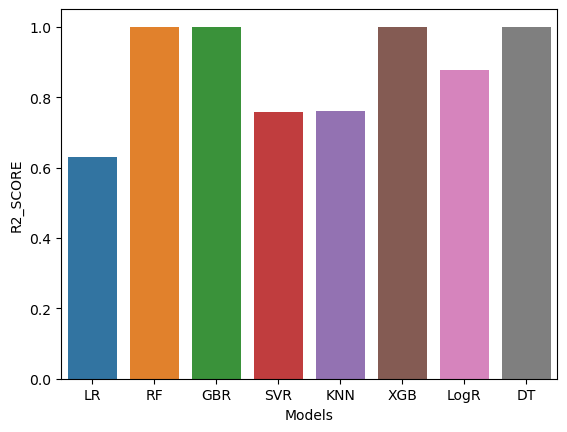

In [29]:
import seaborn as sns
sns.barplot(final_data, x="Models", y="R2_SCORE")

## Computing their R squared values on the validation data

In [30]:
y_pred1 = lr.predict(X_val_norm)
y_pred2 = rf.predict(X_val_norm)
y_pred3 = xgb.predict(X_val_norm)
y_pred4= svr.predict(X_val_norm)
y_pred5= knn.predict(X_val_norm)
y_pred6 = xgr.predict(X_val_norm)
y_pred7 = logr.predict(X_val_norm)
y_pred8= dt.predict(X_val_norm)

In [31]:
score1 = metrics.r2_score(y_val,y_pred1)
score2 = metrics.r2_score(y_val,y_pred2)
score3 = metrics.r2_score(y_val,y_pred3)
score4 = metrics.r2_score(y_val,y_pred4)
score5 = metrics.r2_score(y_val,y_pred5)
score6 = metrics.r2_score(y_val,y_pred6)
score7 = metrics.r2_score(y_val,y_pred7)
score8 = metrics.r2_score(y_val,y_pred8)

In [32]:
final_data = pd.DataFrame({'Models':['LR','RF','GBR','SVR','KNN','XGB','LogR','DT'],"R2_SCORE":[score1,score2,score3,score4,score5,score6,score7,score8]})
final_data

,Models,R2_SCORE
0,LR,0.586141
1,RF,1.000000
2,GBR,1.000000
3,SVR,0.739702
4,KNN,0.760503
5,XGB,1.000000
6,LogR,0.889842
7,DT,1.000000


<Axes: xlabel='Models', ylabel='R2_SCORE'>

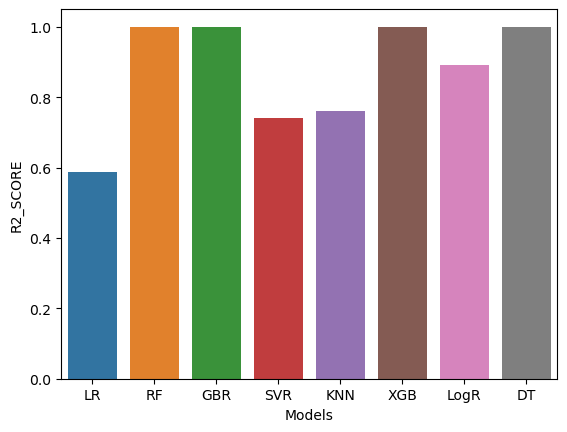

In [33]:
sns.barplot(final_data, x="Models", y="R2_SCORE")

### Compute their root mean square errors for each model

In [34]:
from sklearn.metrics import mean_squared_error as mse

#### Linear Regression

In [35]:
print(mse(lr.predict(X_train_norm),y_train,squared=False), mse(lr.predict(X_test_norm),y_test,squared=False),mse(lr.predict(X_val_norm),y_val,squared=False))

0.3094921541479654 0.30097479978453034 0.3189053730987768


#### X-Gradient Boost

In [36]:
print(mse(xgb.predict(X_train_norm),y_train,squared=False), mse(xgb.predict(X_test_norm),y_test,squared=False),mse(xgb.predict(X_val_norm),y_val,squared=False))

1.3163822923651612e-05 1.3161372266473762e-05 1.3167020705522779e-05


#### Support Vector Regression

In [37]:
print(mse(svr.predict(X_train_norm),y_train,squared=False), mse(svr.predict(X_test_norm),y_test,squared=False),mse(svr.predict(X_val_norm),y_val,squared=False))

0.23326006305957706 0.24317732998238065 0.25291291367519336


#### K-Nearest Neighbours

In [38]:
print(mse(knn.predict(X_train_norm),y_train,squared=False), mse(knn.predict(X_test_norm),y_test,squared=False),mse(knn.predict(X_val_norm),y_val,squared=False))

0.20137749972378408 0.24233471614624583 0.24259740968261262


#### Random Forest

In [39]:
print(mse(rf.predict(X_train_norm),y_train,squared=False), mse(rf.predict(X_test_norm),y_test,squared=False),mse(rf.predict(X_val_norm),y_val,squared=False))

0.0 0.0 0.0


#### XBG Boost Regressor  

In [40]:
print(mse(xgr.predict(X_train_norm),y_train,squared=False), mse(xgr.predict(X_test_norm),y_test,squared=False),mse(xgr.predict(X_val_norm),y_val,squared=False))

1.6138317255071135e-05 1.6135312844631037e-05 1.6142237611352285e-05


#### Logistic Regression

In [41]:
print(mse(logr.predict(X_train_norm),y_train,squared=False), mse(logr.predict(X_test_norm),y_test,squared=False),mse(logr.predict(X_val_norm),y_val,squared=False))

0.15974461276617435 0.17393900387797928 0.16452982615400624


### Decision Tree

In [42]:
print(mse(dt.predict(X_train_norm),y_train,squared=False), mse(dt.predict(X_test_norm),y_test,squared=False),mse(dt.predict(X_val_norm),y_val,squared=False))

0.0 0.0 0.0


### To find the best fitted model, to reduce overfitting or underfitting. One method of attempting this is by finetuning. (See if we can apply for all Regression Models.)

In [43]:

from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=123) #set 5-fold cross validation after shuffle the dataset with random seed 7

In [44]:
# fine tune parameters for rf model
from sklearn.model_selection import GridSearchCV

grid_params_rf = {
            'n_estimators': [100, 150, 200, 250, 300],
            'max_depth': [1,2,3,4],
}

rf = RandomForestRegressor()
gs_rf_result = GridSearchCV(rf, grid_params_rf, cv=kfold).fit(X_train_norm, y_train)
print(gs_rf_result.best_score_)

1.0


The parameters that can be applied in grid_params can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html You can add more values and parameters in the grid_params_svr. Note: it will take some time to find the optimal SVM model. (sometimes more than 1 hour or even more)

### Support Vector Machine

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params_svr = {
    #Change () to [] for kernel
    'kernel': ['linear', 'poly','rbf', 'sigmoid'],
    'C': [1, 10],
    'degree': [3, 8],
    'coef0' : [0.01,10,1],
     #Change () to [] for gamma
    'gamma': ['auto','scale']
}

svr = SVR()
gs_svr_result = GridSearchCV(svr, grid_params_svr, cv=kfold).fit(X_train_norm, y_train)
print(gs_svr_result.best_score_)

#### Regression

In [ ]:
# fine tune parameters for lr model
from sklearn.model_selection import GridSearchCV

grid_params_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

lr = LinearRegression()
gs_lr_result = GridSearchCV(lr, grid_params_lr, cv=kfold).fit(X_train_norm, y_train)
print(gs_lr_result.best_score_)

### More to add

Evaluate the trained Linear Regression model using testing dataset

In [ ]:
# use the best model and evaluate on testing set
lr_test_R2 = gs_lr_result.best_estimator_.score(X_test_norm, y_test)
print("R2 of LR in testing:", lr_test_R2)

In [ ]:
# check the parameter setting for the best selected model
gs_lr_result.best_params_

#### Evaluate the trained Support Vector Machine model using testing dataset

In [ ]:
# use the best model and evaluate on testing set
svr_test_R2 = gs_svr_result.best_estimator_.score(X_test_norm, y_test)
print("R2 of SVM in testing:", svr_test_R2)

In [ ]:
# check the parameter setting for the best selected model
gs_svr_result.best_params_

#### Predict with a trained model

In [ ]:
# predict with the first 5 data points
y_predict = gs_lr_result.best_estimator_.predict(X_test_norm[:5]) 
print(y_predict)

In [ ]:
# predict with the first 5 data points
y_predict = gs_svr_result.best_estimator_.predict(X_test_norm[:5]) 
print(y_predict)

#### Save and load a trained model

#### linear regression model

In [ ]:
import pickle

# Save to file in the current working directory
pkl_filename = "lr_model.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(gs_lr_result.best_estimator_, file)

# Load from file
with open(pkl_filename, 'rb') as file:  
    pickle_model = pickle.load(file)

# Calculate the accuracy score and predict target values
score = pickle_model.score(X_test_norm, y_test)  
print("R2 score:", score)  

#### similarly for a svm model

In [ ]:
import pickle

# Save to file in the current working directory
pkl_filename = "svm_model.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(gs_svr_result.best_estimator_, file)

# Load from file
with open(pkl_filename, 'rb') as file:  
    pickle_model = pickle.load(file)

# Calculate the accuracy score and predict target values
score = pickle_model.score(X_test_norm, y_test)  
print("R2 score:", score) 

### https://www.geeksforgeeks.org/how-to-solve-overfitting-in-random-forest-in-python-sklearn/

### https://www.youtube.com/watch?v=6tQhoUuQrOw&t=1536s

### refer from this link: https://www.youtube.com/watch?v=0irmDBWLrco&t=165s

### Useful links https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

####  Demonstrates how to evuluate your Machine Learning models

### https://www.youtube.com/watch?v=LbX4X71-TFI

#### https://github.com/Mikele02171/Main-Stuff/blob/main/Graduate%20Diploma%20of%20Data%20Science/Term%204/Machine%20Learning/MICHAEL%20LE%20CSE5ML%20Assessment%201/CSE5ML%20Assessment%201%20Michael%20Le%20.ipynb